In [1]:
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

# Charger la matrice à partir du fichier CSV
df = pd.read_csv('matrice_votes_deputes.csv')

deputy_names = df['nom_depute']

# Supprimer la colonne des noms des députés
df = df.drop(columns=['nom_depute'])

# Sélectionner uniquement les colonnes de valeurs numériques à normaliser
data_to_normalize = df.iloc[:, 1:]

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les données et remplacer les valeurs dans le DataFrame
df.iloc[:, 1:] = scaler.fit_transform(data_to_normalize)

# Afficher les données normalisées
print(df)


     1    2    3    4    5    6    7    8    9   10
0    0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    1  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.0
2    1  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
3    1  0.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   -1  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.5  0.5
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
264  0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.0  0.5
265  0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
266  1  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
267  1  0.5  0.5  0.5  1.0  1.0  1.0  1.0  0.5  0.5
268  1  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.0  0.5

[269 rows x 10 columns]


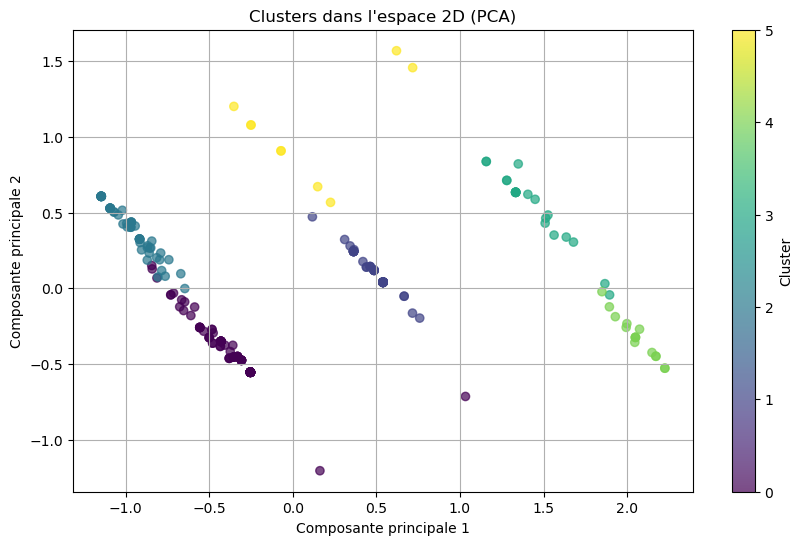

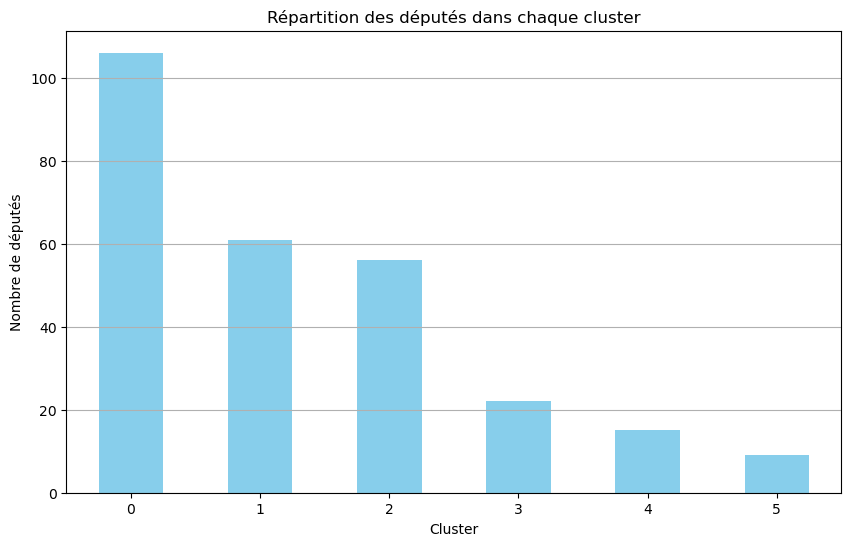

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialiser une liste pour stocker les valeurs du coefficient de silhouette
silhouette_scores = []

# Essayer différents nombres de clusters
for n_clusters in range(2, 11):
    # Appliquer l'algorithme CAH
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(df)
    
    # Calculer le coefficient de silhouette
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

# Trouver le nombre optimal de clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 car on a commencé avec 2 clusters

# Appliquer l'algorithme CAH avec le nombre optimal de clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters)
labels = agg_clustering.fit_predict(df)

# Visualiser les résultats
# Importer PCA pour réduire la dimensionnalité
from sklearn.decomposition import PCA

# Réduire la dimensionnalité des données à 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Afficher les clusters dans l'espace 2D
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Clusters dans l\'espace 2D (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Compter le nombre de députés dans chaque cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Afficher la répartition des députés dans chaque cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des députés dans chaque cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de députés')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
